In [1]:
!pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 108.9 MB/s eta 0:00:00


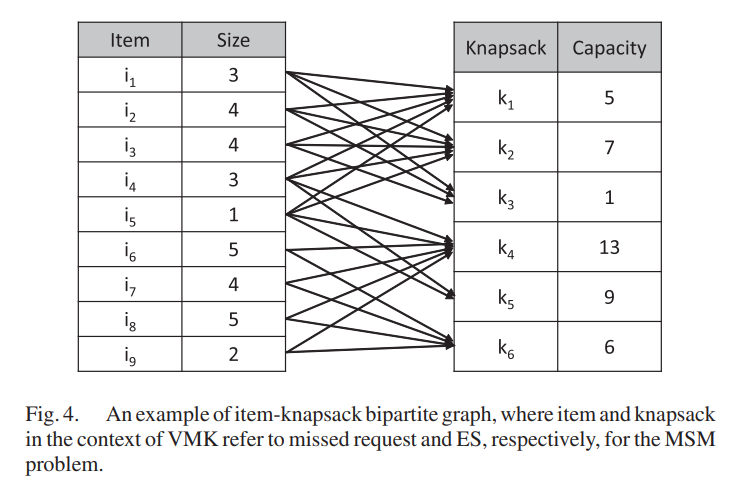

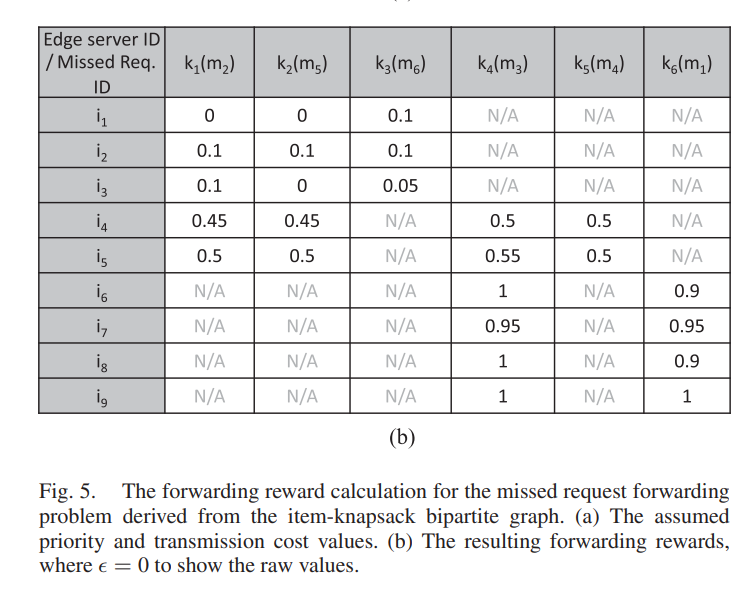

In [13]:
from re import I
from pulp import *

# Define the problem
prob = LpProblem("variant_multi_knapsack", LpMaximize)

# Define the parameters
n,m = 9,6
w = [3,4,4,3,1,5,4,5,2]
C =[5,7,1,13,9,6]
v = [[0,0,0.1,-1,-1,-1],
     [0.1,0.1,0.1,-1,-1,-1],
     [0.1,0,0.05,-1,-1,-1],
     [0.45,0.45,-1,0.5,0.5,-1],
     [0.5,0.5,-1,0.55,0.5,-1],
     [-1,-1,-1,1,-1,0.9],
     [-1,-1,-1,0.95,-1,0.95],
     [-1,-1,-1,1,-1,0.9],
     [-1,-1,-1,1,-1,1]]

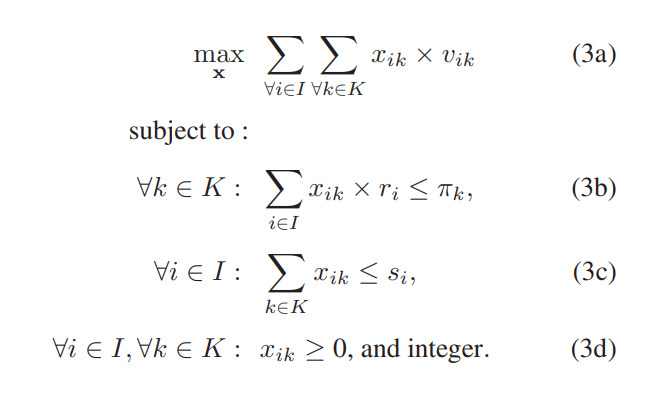

In [14]:
# Define the decision variables
x = LpVariable.dicts("item", ((i, j) for i in range(n) for j in range(m)), lowBound=0, cat='Integer')

# Define the objective function
prob += lpSum([v[i][j] * x[(i, j)] for i in range(n) for j in range(m)])

# Define the constraints
for j in range(m):
  prob += lpSum([1 * x[(i, j)] if i<=2 else 2 * x[(i, j)] for i in range(n)]) <= C[j]
for i in range(n):
  prob += lpSum([x[(i, j)] for j in range(m)]) <= w[i]

#print(prob)
# Solve the problem
prob.solve()

# Print the solution
print("Status:", LpStatus[prob.status])
print("Total value:", value(prob.objective))
for j in range(m):
    print("Knapsack", j+1, ":")
    for i in range(n):
        if x[(i, j)].value() > 0:
            print("- Allocate", x[(i, j)].value(), "part of Item", i+1, "with size", w[i], "and value", v[i][j])


Status: Optimal
Total value: 11.85
Knapsack 1 :
- Allocate 4.0 part of Item 3 with size 4 and value 0.1
Knapsack 2 :
- Allocate 4.0 part of Item 2 with size 4 and value 0.1
- Allocate 1.0 part of Item 5 with size 1 and value 0.5
Knapsack 3 :
- Allocate 1.0 part of Item 1 with size 3 and value 0.1
Knapsack 4 :
- Allocate 1.0 part of Item 6 with size 5 and value 1
- Allocate 5.0 part of Item 8 with size 5 and value 1
Knapsack 5 :
- Allocate 3.0 part of Item 4 with size 3 and value 0.5
Knapsack 6 :
- Allocate 1.0 part of Item 7 with size 4 and value 0.95
- Allocate 2.0 part of Item 9 with size 2 and value 1


NameError: ignored

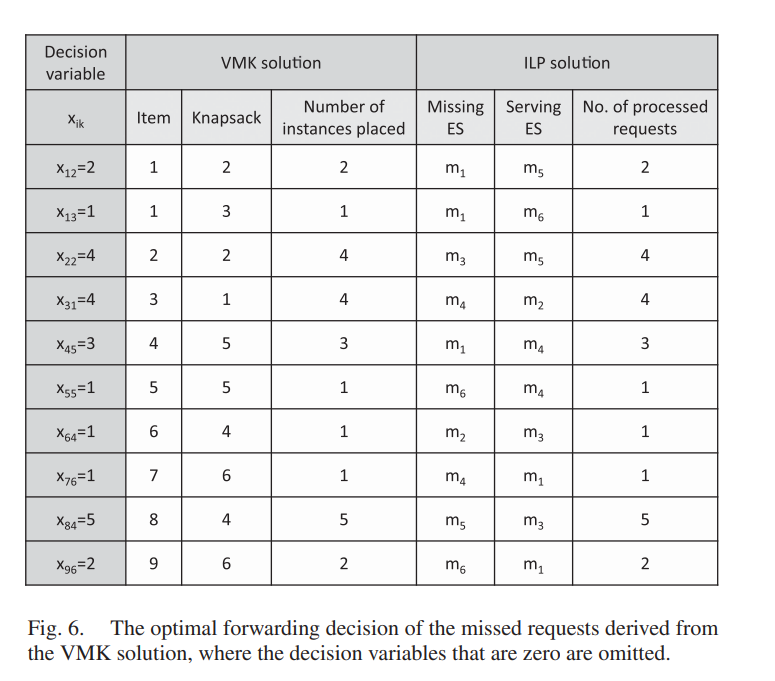

In [12]:


start_time = timeit.default_timer()
# Solve the problem using Lagrangian relaxation
n_iter = 10
for k in range(n_iter):
    # Solve the relaxed problem
    prob.solve()

    # Update the Lagrange multipliers
    mu = []
    for j in range(m):
        mu_j = C[j] - lpSum([x[(i, j)].varValue for i in range(n)])
        mu.append(mu_j)

    # Update the objective function with the Lagrange multipliers
    obj = lpSum([v[i][j] * x[(i, j)] for i in range(n) for j in range(m)])
    for j in range(m):
        obj -= mu[j] * (lpSum([x[(i, j)].varValue for i in range(n)]) - C[j])

    # Update the objective function of the problem
    prob.setObjective(obj)

# Print the solution
print("Status:", LpStatus[prob.status])
print("Total value:", value(prob.objective))
for j in range(m):
    print("Knapsack", j+1, ":")
    for i in range(n):
        if x[(i, j)].varValue > 0:
            print("- Allocate", x[(i, j)].varValue, "part of Item", i+1, "with size", w[i], "and value", v[i][j])


Status: Optimal
Total value: 110.85000000000001
Knapsack 1 :
- Allocate 4.0 part of Item 3 with size 4 and value 0.1
Knapsack 2 :
- Allocate 4.0 part of Item 2 with size 4 and value 0.1
- Allocate 1.0 part of Item 5 with size 1 and value 0.5
Knapsack 3 :
- Allocate 1.0 part of Item 1 with size 3 and value 0.1
Knapsack 4 :
- Allocate 1.0 part of Item 6 with size 5 and value 1
- Allocate 5.0 part of Item 8 with size 5 and value 1
Knapsack 5 :
- Allocate 3.0 part of Item 4 with size 3 and value 0.5
Knapsack 6 :
- Allocate 1.0 part of Item 7 with size 4 and value 0.95
- Allocate 2.0 part of Item 9 with size 2 and value 1


The time taken to execute  0.1860602819999997
